In [1]:
import os,glob
import numpy as np
import matplotlib.pyplot as plt
import struct
import cv2

## Try to analysis Fresnel fringes on diffraction disk using morphological operator
Current test result suggests that it is not very helpful to analysis Fresnel fringes using morph operator, the intensity plot cannot show the variation caused by fringes at the edge of diffraction disk.

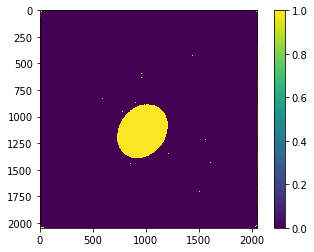

In [5]:
filepath = '/srv/home/chenyu/DEbackup/030620/DiffractionFocus_CL60/DL0.3051.mrc'
image = loadMRCfile(filepath)
threshold = 50
image_binary = np.heaviside(image-threshold,1)
plt.imshow(image_binary)
plt.colorbar()

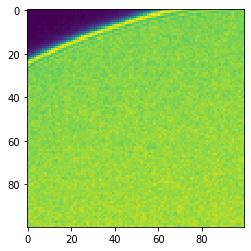

In [6]:
# apply morphological opening to remove noise points outside zero disk
kernel = np.ones((1,1),np.uint8)
image_2 = cv2.morphologyEx(image_binary, cv2.MORPH_OPEN, kernel)
plt.imshow((image_2*image)[900:1000,900:1000])

In [8]:
kernel = np.ones((2,2),np.uint8)
image_3 = image_2
int_list = []
while np.sum(image_2)>1000:
    image_3 = cv2.erode(image_2,kernel,iterations = 1)
    if np.sum(image_2 - image_3) >0:
        int_list.append(np.sum(image*(image_2 - image_3))/np.sum(image_2 - image_3))
    image_2 = image_3
#     print(np.sum(image_2))
# plt.imshow(image_2 - image_3)

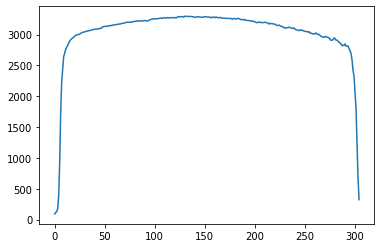

In [15]:
plt.plot(int_list)

In [10]:
int_list

[92.10332749562171,
 112.94856440964226,
 129.99765602109582,
 175.96209587513934,
 380.0922712933754,
 907.5472043996334,
 1731.5418326693227,
 2232.213701431493,
 2445.1806981519508,
 2642.186983471074,
 2703.387564766839,
 2758.8709677419356,
 2792.0354535974975,
 2824.458725182863,
 2860.125786163522,
 2895.4694736842107,
 2916.243928194298,
 2933.711111111111,
 2945.7211028632028,
 2957.0223166843784,
 2974.6315228966987,
 2986.7321237993597,
 2989.220320855615,
 2998.4683815648445,
 3004.2008592910847,
 3006.3692142088266,
 3020.2740021574973,
 3030.078918918919,
 3037.5406283856987,
 3040.5526601520087,
 3043.5429815016323,
 3050.5954198473282,
 3055.901639344262,
 3059.208105147864,
 3062.2810098792534,
 3064.11013215859,
 3069.1721854304637,
 3078.924778761062,
 3078.6086474501108,
 3083.58,
 3087.650334075724,
 3089.375,
 3088.8701007838745,
 3091.181818181818,
 3093.6434195725533,
 3096.7260428410373,
 3104.9141242937853,
 3106.365798414496,
 3126.0501138952163,
 3129.529680

In [3]:
def loadMRCfile(filepath):
    with open(filepath, mode='rb') as file: # b is important -> binary
        file.seek(0)
        read_bytes = file.read(8)
        frame_width = struct.unpack('<i',read_bytes[0:4])
        frame_width = frame_width[0]
        frame_height = struct.unpack('<i',read_bytes[4:8])
        frame_height = frame_height[0]
        image = np.zeros((frame_height,frame_width))
        file.seek(256*4)
        dataset = file.read(frame_width*frame_height*4)
        for irow in range(frame_height):
            for icol in range(frame_width):
                pixel = struct.unpack('<f',dataset[(irow*frame_width+icol)*4:(irow*frame_width+icol+1)*4])[0]
                image[irow,icol] = pixel
        return image